# K-Means Clustering

## Importing the libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importing the dataset

In [3]:
#Change the date to the previous day
query = """
SELECT 
*
FROM `perceptive-ivy-290216.nba_api_player_stats.base_totals`
# WHERE SEASON='2022-23'
"""
project_id = "perceptive-ivy-290216"
player_stats = pd.read_gbq(query=query, project_id=project_id, dialect='standard')
player_stats=player_stats.fillna(0)

/var/folders/x_/b65sxrpx6737wtqnt0ctv71w0000gn/T/ipykernel_1819/220078669.py:9: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  player_stats = pd.read_gbq(query=query, project_id=project_id, dialect='standard')


In [10]:
# dataset=player_stats[(player_stats['W']>10)&(player_stats['MIN']>0)]
dataset=player_stats[player_stats["Season"]=="2023-24"]
dataset=dataset[['PLAYER_NAME','TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS']]
dataset.head()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,Isaiah Wong,IND,23.0,1,1.0,4.283333,1,3,0.333,0,...,0,0,0,0,0,0,0,0,2,-5
1,Izaiah Brockington,NOP,24.0,1,1.0,3.383333,2,5,0.400,0,...,2,0,0,0,0,1,0,0,4,3
2,Jalen Crutcher,NOP,24.0,1,1.0,2.650000,0,1,0.000,0,...,0,0,0,0,0,0,0,0,0,1
3,Javonte Smart,PHI,24.0,1,1.0,0.666667,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0,-3
4,Ron Harper Jr.,TOR,24.0,1,1.0,3.650000,0,0,0.000,0,...,0,1,0,0,0,0,2,0,0,-9


In [35]:
# X = dataset.iloc[:,3:].values
X = dataset.loc[:,['GP', 'MIN', 'FGA','FG3A','FTA', 'REB', 'AST', 'PTS', 'PLUS_MINUS']].values
X

array([[1, 4.283333333333333, 3, ..., 0, 2, -5],
       [1, 3.3833333333333333, 5, ..., 0, 4, 3],
       [1, 2.65, 1, ..., 0, 0, 1],
       ...,
       [77, 2217.4766666666665, 973, ..., 296, 1185, -350],
       [78, 2345.555, 1186, ..., 343, 1356, -552],
       [80, 2067.435, 794, ..., 157, 1070, -445]], dtype=object)

In [75]:
dataset_2=dataset.iloc[:,4:]
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(dataset_2)
dataset_2

,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS
0,1.000,4.283333,1,3,0.333,0,1,0.000,0,0,...,0,0,0,0,0,0,0,0,2,-5
1,1.000,3.383333,2,5,0.400,0,1,0.000,0,0,...,2,0,0,0,0,1,0,0,4,3
2,1.000,2.650000,0,1,0.000,0,0,0.000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.000,0.666667,0,0,0.000,0,0,0.000,0,0,...,0,0,0,0,0,0,0,0,0,-3
4,1.000,3.650000,0,0,0.000,0,0,0.000,0,0,...,0,1,0,0,0,0,2,0,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.155,1351.110000,219,512,0.428,90,240,0.375,58,66,...,125,236,90,44,12,24,103,73,586,-250
568,0.187,2256.643333,406,803,0.506,88,235,0.374,202,273,...,540,286,160,59,36,76,185,251,1102,-329
569,0.182,2217.476667,417,973,0.429,124,369,0.336,227,303,...,264,296,190,57,41,88,204,227,1185,-350
570,0.192,2345.555000,490,1186,0.413,184,564,0.326,192,219,...,212,343,188,86,25,75,244,209,1356,-552


In [77]:
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [82]:
>>> pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.61
1,0.10
2,0.07
3,0.05
4,0.04
5,0.03
6,0.03
7,0.02
8,0.02
9,0.01


## Using the elbow method to find the optimal number of clusters

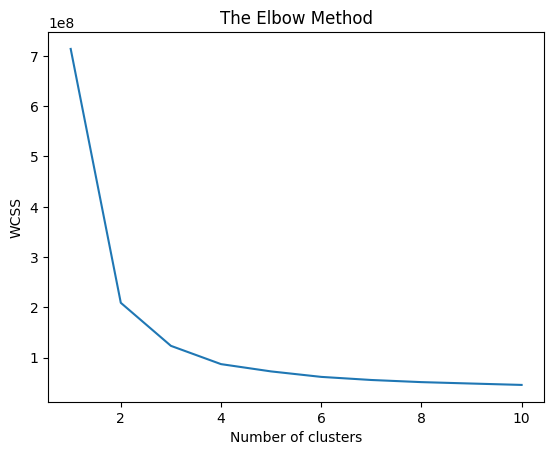

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2,

In [58]:
cluster_0=dataset[y_kmeans==0].copy()
cluster_0["cluster"]="cluster_0"
cluster_1=dataset[y_kmeans==1].copy()
cluster_1["cluster"]="cluster_1"
cluster_2=dataset[y_kmeans==2].copy()
cluster_2["cluster"]="cluster_2"
cluster_3=dataset[y_kmeans==3].copy()
cluster_3["cluster"]="cluster_3"
cluster_4=dataset[y_kmeans==4].copy()
cluster_4["cluster"]="cluster_4"
cluster_final=pd.concat([cluster_0, cluster_1, cluster_2, cluster_3, cluster_4], ignore_index=True)
cluster_final.tail()

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,cluster
567,Jabari Walker,POR,21.0,72,0.250,1700.573333,234,509,0.460,41,...,71,66,42,22,63,173,138,638,-338,cluster_2
568,Cedi Osman,SAS,29.0,72,0.236,1268.751667,184,384,0.479,86,...,119,47,36,11,18,107,71,489,-353,cluster_2
569,Julian Champagnie,SAS,22.0,74,0.257,1467.875000,164,402,0.408,101,...,103,57,48,42,20,77,63,504,-141,cluster_2
570,Malaki Branham,SAS,21.0,75,0.240,1594.326667,271,628,0.432,93,...,156,91,27,8,41,94,62,690,-373,cluster_2
571,Marcus Sasser,DET,23.0,71,0.155,1351.110000,219,512,0.428,90,...,236,90,44,12,24,103,73,586,-250,cluster_2


In [60]:
cluster_final

,PLAYER_NAME,TEAM_ABBREVIATION,AGE,GP,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,...,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,cluster
0,Isaiah Wong,IND,23.0,1,1.000,4.283333,1,3,0.333,0,...,0,0,0,0,0,0,0,2,-5,cluster_0
1,Izaiah Brockington,NOP,24.0,1,1.000,3.383333,2,5,0.400,0,...,0,0,0,0,1,0,0,4,3,cluster_0
2,Jalen Crutcher,NOP,24.0,1,1.000,2.650000,0,1,0.000,0,...,0,0,0,0,0,0,0,0,1,cluster_0
3,Javonte Smart,PHI,24.0,1,1.000,0.666667,0,0,0.000,0,...,0,0,0,0,0,0,0,0,-3,cluster_0
4,Ron Harper Jr.,TOR,24.0,1,1.000,3.650000,0,0,0.000,0,...,1,0,0,0,0,2,0,0,-9,cluster_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Jabari Walker,POR,21.0,72,0.250,1700.573333,234,509,0.460,41,...,71,66,42,22,63,173,138,638,-338,cluster_2
568,Cedi Osman,SAS,29.0,72,0.236,1268.751667,184,384,0.479,86,...,119,47,36,11,18,107,71,489,-353,cluster_2
569,Julian Champagnie,SAS,22.0,74,0.257,1467.875000,164,402,0.408,101,...,103,57,48,42,20,77,63,504,-141,cluster_2
570,Malaki Branham,SAS,21.0,75,0.240,1594.326667,271,628,0.432,93,...,156,91,27,8,41,94,62,690,-373,cluster_2


## Visualising the clusters

In [68]:
fig=px.scatter(cluster_final, 
               x="MIN",
               y="PTS", 
               color='cluster',
               hover_data=['PLAYER_NAME','TEAM_ABBREVIATION',
               'AGE', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
               'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
               'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS'],
               height=700, 
               width=900,
        )

# fig2=px.scatter(Final[Final['value']==1], x="POINTS_PER_MIN_", y="CATCH_SHOOT_FGM_", color_discrete_sequence=['blue'],
#         hover_data=["PLAYER_NAME","Salary"],
#         height=700, width=900,
#         )

# fig3=px.scatter(Final[Final['value']==2], x="POINTS_PER_MIN_", y="CATCH_SHOOT_FGM_", color_discrete_sequence=['orange'],
#         hover_data=["PLAYER_NAME","Salary"],
#         height=700, width=900,
#         )
# fig4=px.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color_discrete_sequence=['yellow'],
#         height=1000, width=1000,
#         )
# fig4.update_traces(marker=dict(size=20))

# fig.add_traces(
#     list(fig2.select_traces())
# )

# fig.add_traces(
#     list(fig3.select_traces())
# )

# fig.add_traces(
#     list(fig4.select_traces())
# )

fig.update_layout(
    xaxis_title="MIN",
    yaxis_title="FGA",
    # xaxis_range=[0,1]
)

fig.show()